# Face Detection and Spatial Transformations
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### With OpenCv

In [2]:
def face_detection(path):
    cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)

    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 7)

    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.show()

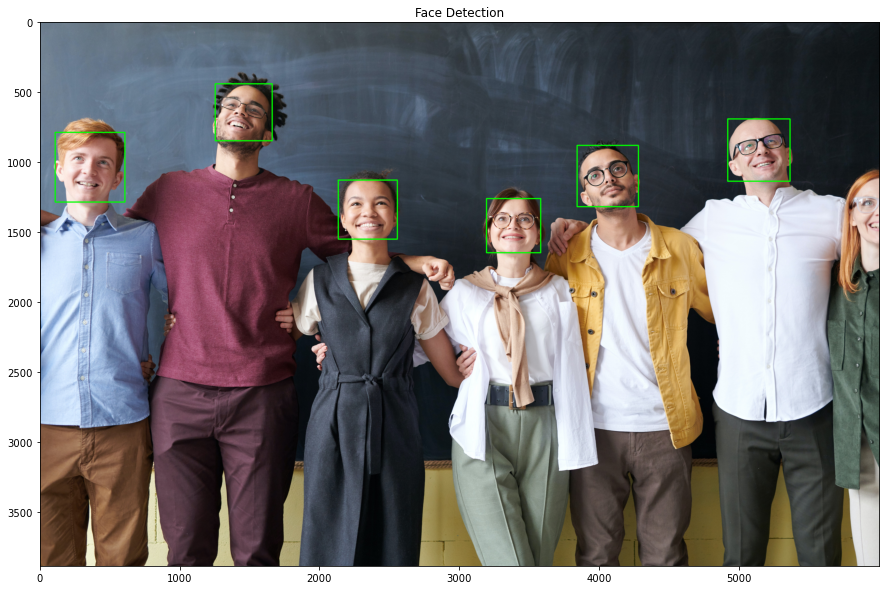

In [3]:
face_detection('Images/image1.jpg')

### Spatial Transformations

In [4]:
def face_detection(path):
    cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)

    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    return image, faces

##### Mirroring

In [5]:
def Mirroring(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 7)
        for i in range(y, y + h):
            for j in range(x, x + w // 2):
                image[i, j], image[i, w + x - (j - x) - 1] = image[i, w + x - (j - x) - 1], image[i, j]
                
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Mirroring')
    plt.show()

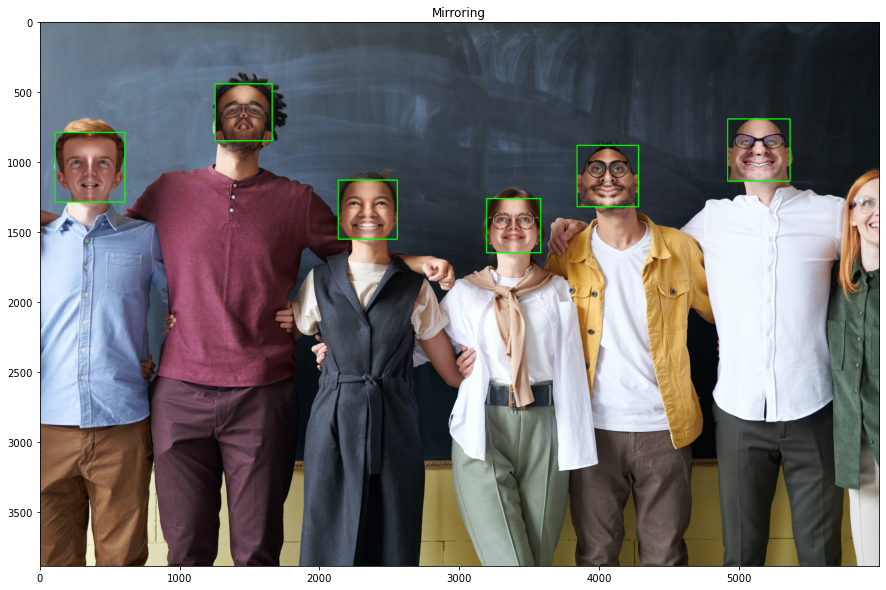

In [6]:
image, faces = face_detection('Images/image1.jpg')
Mirroring(image, faces)

##### Reverse

In [7]:
def Reverse(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 7)
        for i in range(y, y + h):
            for j in range(x, x + w // 2):
                temp = image[i, j].copy()
                image[i, j] = image[i, w + x - (j - x) - 1]
                image[i, w + x - (j - x) - 1] = temp
    
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Reverse')
    plt.show()

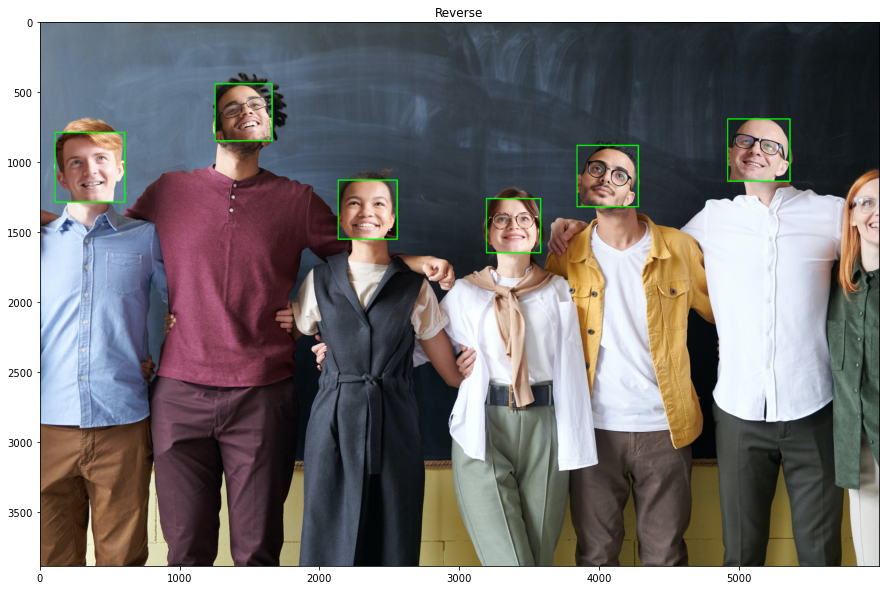

In [8]:
image, faces = face_detection('Images/image1.jpg')
Reverse(image, faces)

##### Rotate

In [17]:
def rotation(image, degree):
    radian = np.radians(degree)
    rotate_image = np.uint8(np.zeros(image.shape))

    height = rotate_image.shape[0]
    width  = rotate_image.shape[1]

    midx, midy = width // 2, height // 2

    for i in range(height):
        for j in range(width):
            x = np.cos(radian) * (i - midx) + np.sin(radian) * (j - midy)
            y = np.sin(radian) * -(i - midx) + np.cos(radian) * (j - midy) 

            x = round(x) + midx 
            y = round(y) + midy 

            if 0 <= x < image.shape[0] and 0 <= y < image.shape[1]:
                rotate_image[i, j] = image[x, y]

    rotate_image = cv2.resize(rotate_image, (height, width), interpolation=cv2.INTER_LANCZOS4)
    return rotate_image 

In [18]:
def Rotate(image, faces, degree):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 7)
        image[y:y + h, x:x + w] = rotation(image[y:y + h, x:x + w], degree)

    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Rotate {degree}')
    plt.show()

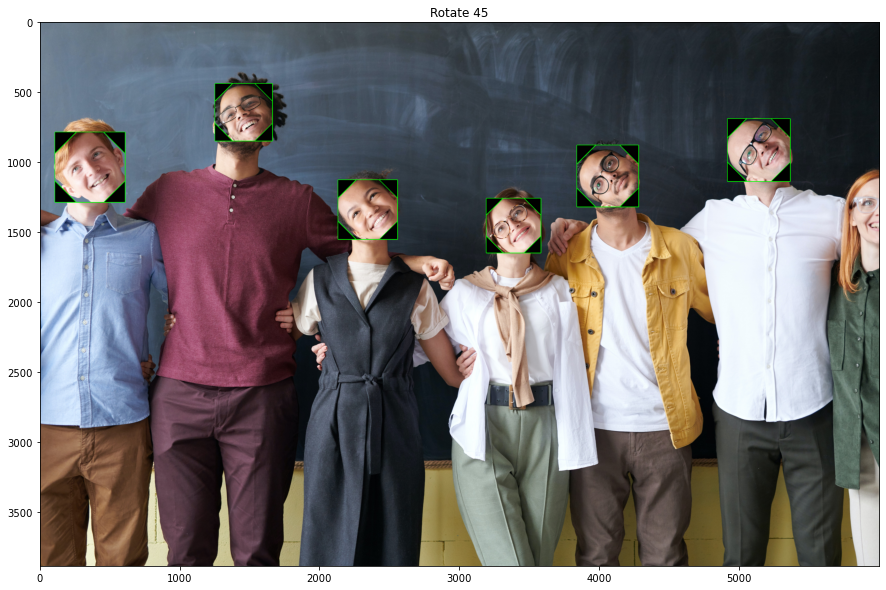

In [19]:
# Rotate 45
image, faces = face_detection('Images/image1.jpg')
Rotate(image, faces, 45)

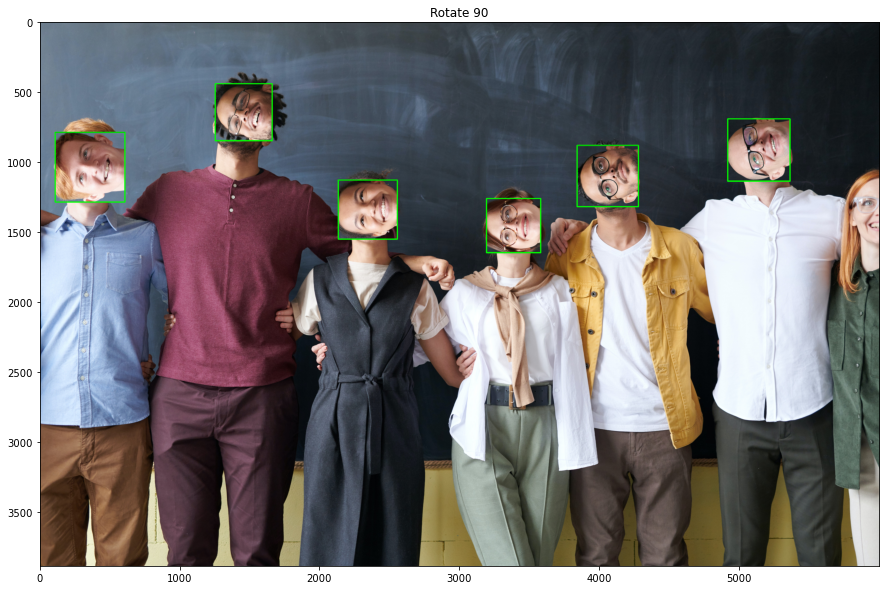

In [165]:
# Rotate 90
image, faces = face_detection('Images/image1.jpg')
Rotate(image, faces, 90)